In [1]:
#https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/
#Recommandations Systems
#The dataset that we are going to use for this problem is the MovieLens Dataset
#D:\\movies\\ratings_small.csv
import numpy as  np
import pandas as pd
r_cols = ['user_id', 'movieId', 'rating', 'unix_timestamp']
ratings = pd.read_csv("D:\\Data\\movies\\ratings_small.csv",names=r_cols,header=0)

# Getting number of users and movies from the dataset.
user_ids = ratings.user_id.unique().tolist()
movie_ids = ratings.movieId.unique().tolist()
print('Number of Users: {}'.format(len(user_ids)))
print('Number of Movies: {}'.format(len(movie_ids)))

Number of Users: 671
Number of Movies: 9066


In [2]:
ratings.head()

,user_id,movieId,rating,unix_timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
#read movie data set D:\\movies\\movies.csv
#m_cols = ['movie_id', 'movie_title', 'genre']
movies = pd.read_csv('D:\\Data\\movies\\movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#Merage two datasets to add movie titles to rating data
movie_data = pd.merge(ratings, movies, on='movieId')
movie_data.head()

,user_id,movieId,rating,unix_timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


Now let's take a look at the average rating of each movie. To do so, we can group the dataset by the title of the movie and then calculate the mean of the rating for each movie.

In [6]:
movie_data.groupby('title')['rating'].mean().head()

title
'Hellboy': The Seeds of Creation (2004)    2.000000
'Round Midnight (1986)                     2.250000
'Salem's Lot (2004)                        3.500000
'Til There Was You (1997)                  2.625000
'burbs, The (1989)                         3.052632
Name: rating, dtype: float64

In [10]:
#The  above ratings are not sorted,lets us sort
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Unvanquished, The (Aparajito) (1957)    5.0
War Room (2015)                         5.0
Walker (1987)                           5.0
Misfits, The (1961)                     5.0
Something Borrowed (2011)               5.0
Name: rating, dtype: float64

In [11]:
#Here no. users who rated is ignored. Even if only one users has given 5 it will be shown
#Let us count the number of users who rated  
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

In [12]:
#Execute the following script to create ratings_mean for a movie
#first add the average rating of each movie to this dataframe:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
#Add rating count as column
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
title,,
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Round Midnight (1986),2.250000,2
'Salem's Lot (2004),3.500000,1
'Til There Was You (1997),2.625000,4
"'burbs, The (1989)",3.052632,19


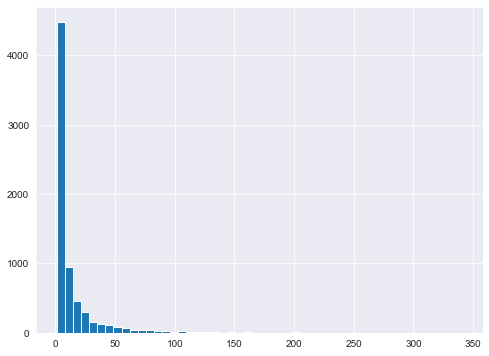

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)
plt.show()

From the output, you can see that most of the movies have received less than 50 ratings. While the number of movies having more than 100 ratings is very low.

We will use the correlation between the ratings of a movie as the similarity metric. To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie. Bear in mind that this matrix will have a lot of null values since every movie is not rated by every user.

In [15]:
user_movie_rating = movie_data.pivot_table(index='user_id', columns='title', values='rating')
print(user_movie_rating.shape)
user_movie_rating.head()

(671, 7062)


title,'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),...,Zoom (2006),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We know that each column contains all the user ratings for a particular movie. Let's find all the user ratings for the movie "Forrest Gump (1994)" and find the movies similar to it. We chose this movie since it has the highest number of ratings and we want to find the correlation between movies that have a higher number of ratings.

To find the user ratings for "Forrest Gump (1994)", execute the following script:

In [17]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']
forrest_gump_ratings.head()

user_id
1    NaN
2    3.0
3    5.0
4    5.0
5    4.0
Name: Forrest Gump (1994), dtype: float64

Now let's retrieve all the movies that are similar to "Forrest Gump (1994)". We can find the correlation between the user ratings for the "Forest Gump (1994)" and all the other movies using corrwith() function as shown below:

In [18]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

C:\Users\Ashok\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Ashok\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422
10 (1979),0.474420


In the above script, we first retrieved the list of all the movies related to "Forrest Gump (1994)" along with their correlation value, using corrwith() function. Next, we created a dataframe that contains movie title and correlation columns. We then removed all the NA values from the dataframe and displayed its first 5 rows using the head function.

In [40]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Wishmaster (1997),1.0
Silverado (1985),1.0
Say It Isn't So (2001),1.0
Palmetto (1998),1.0
Bugsy (1991),1.0
Another Thin Man (1939),1.0
Rosetta (1999),1.0
Swimfan (2002),1.0
"Toy, The (1982)",1.0


A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings. To do so, will add the rating_counts column from the rating_mean_count dataframe to our corr_forrest_gump dataframe. Execute the following script to do so:

In [19]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])
corr_forrest_gump.head()

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.044946,19
(500) Days of Summer (2009),0.624458,45
*batteries not included (1987),0.603023,7
...And Justice for All (1979),0.173422,13
10 (1979),0.474420,5


In [42]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,341
My Big Fat Greek Wedding (2002),0.626240,51
"Beautiful Mind, A (2001)",0.575922,114
"Few Good Men, A (1992)",0.555206,76
Million Dollar Baby (2004),0.545638,65


Conclusion :  The movies similar to Forrest Gump(1994) are :
1. My Big Fat Greek Wedding
2. Beautiful Mind
3. Few Good Men
4. Million Dollar Baby

